# **Tarea Nº 2**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

1. Import the `flights.csv` dataset. Find all flights that:

    a. Had an arrival delay of three or more hours
    b. Flew to Houston (IAH or HOU)
    c. Were operated by United, American, or Southwest
    d. Departed in spring (March, April, and June)
    e. Arrived more than two hours late, but didn’t leave late
    f. Were delayed by at least an hour, but made up over 30 minutes in flight 7. Departed between midnight and 5am (inclusive)

In [ ]:
# Solution

2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [2]:
# Solution
#import pandas as pd
#import pyreadstat
#flights = pd.read_csv(r"flights.csv", index_col=0)
#display(flights, type(flights))

flights.isnull().sum()
## while missing values might indicate incomplete records or data collections issues
## It's possible that cancelled or delayed flights might have taken part on the missing values issue


year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? Why? (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [ ]:
# Solution

4. What does `False & None` evaluate to? Why?

In [ ]:
# Solution

## Select columns

5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [ ]:
# Solution

## Sort columns

6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [10]:
# Solution
flights.sort_values(by='arr_time', ascending=False).head(1)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
244604,2013,6,24,2246.0,1859,227.0,2400.0,2026,214.0,EV,4131,N11150,EWR,RIC,48.0,277,18,59,2013-06-24 18:00:00


7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [ ]:
# Solution

In [ ]:
8. How could you sort all missing values to the start? 

In [11]:
# Solution
flights.sort_values(by='arr_time', na_position='first')
# Entendí que se refería a un valor, por lo que repetí el arr_time de la preg 6

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
755,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-01 19:00:00
839,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 16:00:00
840,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-01 19:00:00
841,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 15:00:00
842,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64888,2013,11,10,2027.0,2015,12.0,2400.0,2354,6.0,DL,427,N197DN,JFK,LAX,329.0,2475,20,15,2013-11-10 20:00:00
120641,2013,2,11,2220.0,2000,140.0,2400.0,2137,143.0,EV,4106,N13914,EWR,GSO,79.0,445,20,0,2013-02-11 20:00:00
299005,2013,8,20,2302.0,2305,-3.0,2400.0,13,-13.0,B6,718,N348JB,JFK,BOS,37.0,187,23,5,2013-08-20 23:00:00
138872,2013,3,3,2248.0,2251,-3.0,2400.0,2357,3.0,B6,22,N307JB,JFK,SYR,44.0,209,22,51,2013-03-03 22:00:00


## Add new variables 

9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [16]:
# Solution
flights['arr_time_min'] = flights['arr_time']*60
flights['arr_time_min'] = flights['arr_time_min'].mod(1440)

flights['dep_time_min'] = flights['dep_time']*60
flights['dep_time_min'] = flights['dep_time_min'].mod(1440)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,arr_time_min,dep_time_min
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,840.0,780.0
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,600.0,300.0
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,660.0,840.0
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,1200.0,960.0
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,1200.0,120.0


10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

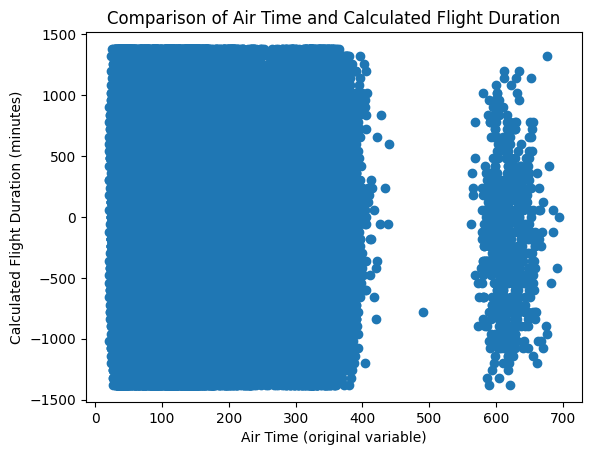

In [25]:
# Solution
# se entiende como plot desde la importación del paquete matplotlib.pyplot
# !pip install matplotlib
#import matplotlib.pyplot as plt

#creamos flights['calculates_duration'] al restar arr_time min con dep_time_min
flights['calculates_duration'] = flights['arr_time_min'] - flights['dep_time_min']
plt.scatter(flights['air_time'], flights['calculates_duration'])
plt.xlabel('Air Time (original variable)')
plt.ylabel('Calculated Flight Duration (minutes)')
plt.title('Comparison of Air Time and Calculated Flight Duration')
plt.show()

11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not?
Identify a major data issue and subtle one.

In [ ]:
# Solution

12. Implement your fix to the major probelm. Remake the plot from the previous question.

In [ ]:
# Solution

13. Find the 10 most delayed flights 

In [ ]:
# Solution

## Summarizing grouped data

14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [ ]:
# Solution

15. Which plane (`tailnum`) has the most minutes of delays total?

In [ ]:
# Solution

16. Which airlines only offer flights from New York to one other airport?

In [ ]:
# Solution

17. Calculate the median arrival delay by airline.

In [ ]:
# Solution

18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


In [ ]:
# Solution

19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

In [ ]:
# Solution

20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [ ]:
# Solution